In [1]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe
import imp
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility, PortfolioVaR
import pandas as pd

We are in a good state, target weights with short selling returned


([(0.131, 0.136), (0.132, 0.137)],
 [{'ACWI': 0.7981855495527956, 'rf_rate_cad': 0.20181445044720453},
  {'ACWI': 0.8043084160939141, 'rf_rate_cad': 0.19569158390608604}])

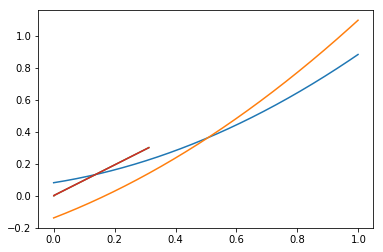

In [2]:
benchmark=Admin()
benchmark.suggestPortfolio('4','2014-04-01')

In [3]:
benchmark.acceptPortfolio(0)

{'ACWI': 2760.4891412830875, 'rf_rate_cad': 40358.85420402051}

In [4]:
benchmark.trackPortfolio()
benchmark.getAccountValue('2014-04-01')

199980.00199980004

In [5]:
import numpy as np 
np.float(benchmark.getAccountValue('2019-06-01'))

540743.9144080993

In [6]:
benchmark.portfolio['2019-06-01'].portfolio

{'ACWI': Deposit-CAD    4553.08139
 dtype: float64, 'rf_rate_cad': Deposit-CAD    109129.935919
 dtype: float64}

In [8]:
benchmark.getAccountValue('2019-06-01')

540743.9144080993

In [11]:
from datetime import datetime
date_format='%Y-%m-%d'
start_date='2014-04-01'
today_date=benchmark.today
all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]
portf_values=[]
# portf_values_norebal=[]
for item in all_dates:
    portf_values.append(benchmark.getAccountValue(item))
#     portf_values_norebal.append(test_admin_norebal.getAccountValue(item))


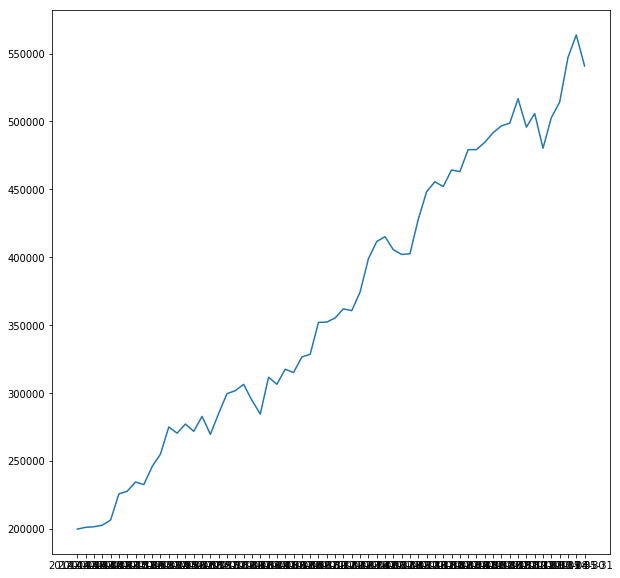

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(all_dates,portf_values)
# plt.plot(all_dates,portf_values_norebal,'--')

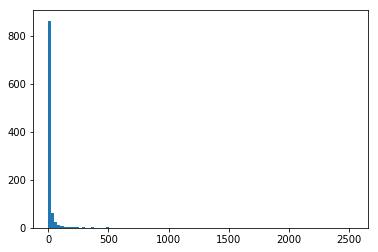

In [41]:
from matplotlib import pyplot as plt
plt.hist(lognormals,bins=100);

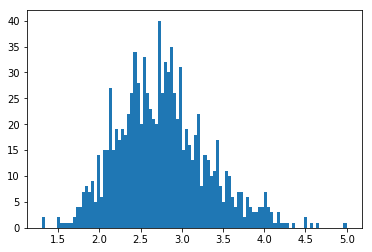

In [42]:
normals=np.random.normal(1,0.2,1000)
lognormals=np.exp(normals)
plt.hist(lognormals,bins=100);

In [13]:
benchmark.portfolio['2019-06-01']

In [7]:
my_cash=universe.get_security('rf_rate_cad')

In [16]:
my_cash.get_slice_prices('2019-06-01','2019-06-01')

Series([], Name: rf_rate_cad, dtype: float64)

In [14]:
my_cash.get_cc_return('2019-06-01','2019-06-01')

IndexError: single positional indexer is out-of-bounds

In [47]:
from HelperFunctions import fill_missing_data_business

In [53]:
fill_missing_data_business(my_cash.price,'2014-04-01','2014-09-01','B').iloc[-1]/fill_missing_data_business(my_cash.price,'2014-04-01','2014-09-01','B').iloc[0]

1.0

In [71]:
import pandas as pd
from datetime import datetime
# [datetime.strftime(item,'%Y-%m-%d') for item in pd.date_range('2003-09-16','2019-06-01',freq='B')]
my_cash.price.reindex([datetime.strftime(item,'%Y-%m-%d') for item in pd.date_range('2003-09-16','2019-06-01',freq='B')],method='ffill')

date
2003-09-16    1.000055
2003-09-17    1.000109
2003-09-18    1.000163
2003-09-19    1.000217
2003-09-22    1.000271
2003-09-23    1.000325
2003-09-24    1.000379
2003-09-25    1.000433
2003-09-26    1.000488
2003-09-29    1.000542
2003-09-30    1.000595
2003-10-01    1.000636
2003-10-02    1.000676
2003-10-03    1.000716
2003-10-06    1.000756
2003-10-07    1.000796
2003-10-08    1.000836
2003-10-09    1.000876
2003-10-10    1.000916
2003-10-13    1.000956
2003-10-14    1.000995
2003-10-15    1.001035
2003-10-16    1.001074
2003-10-17    1.001114
2003-10-20    1.001153
2003-10-21    1.001193
2003-10-22    1.001232
2003-10-23    1.001271
2003-10-24    1.001310
2003-10-27    1.001350
                ...   
2019-04-22    1.248952
2019-04-23    1.249120
2019-04-24    1.249289
2019-04-25    1.249457
2019-04-26    1.249625
2019-04-29    1.249793
2019-04-30    1.249961
2019-05-01    1.249961
2019-05-02    1.249961
2019-05-03    1.249961
2019-05-06    1.249961
2019-05-07    1.249961
2019-0

In [32]:
lambda_par=1
n=1000
mu=1
sigma=2

In [59]:
def model_losses(lambda_par,n,mu,sigma):
    events=np.random.poisson(lambda_par,n)
    sum_losses=[]
    for item in events:
        losses=np.random.lognormal(mu,sigma,item)
        sum_losses.append(np.sum(losses))
    return sum_losses
    
def run_sim(lambda_par,n,mu,sigma,num_times):
    percentiles=[]
    for i in range(0,num_times):
        sum_losses=model_losses(lambda_par,n,mu,sigma)
        percentiles.append(np.percentile(sum_losses,99.9))
    return percentiles

In [60]:
run_sim(300,100000,4,2.3,5)

[1991865.2881134236,
 1961486.3701883908,
 1970567.1790655355,
 1951295.7423659512,
 2064803.81097716]

In [68]:
higher_sig_vector=run_sim(300,1000000,4,2.7,5)

In [69]:
(np.max(higher_sig_vector)-np.min(higher_sig_vector))/np.min(higher_sig_vector)

0.029741760716709625

In [70]:
higher_sig_vector

[11242969.09508066,
 11313682.241219873,
 10986912.129644472,
 11056692.853016132,
 11161304.556847122]